<a href="https://colab.research.google.com/github/Nagmashaik123/Nagma_INFO5731_Spring2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Importing my previous excercise data set to perform tpic modelling
import pandas as pd
data = pd.read_csv("/content/review.csv")
data 



,Doc_Id,Review
0,Review 1,"Every once in a while a movie comes, that trul..."
1,Review 2,This is a movie that only those who have felt ...
2,Review 3,"Truly a masterpiece, The Best Hollywood film o..."
3,Review 4,Joaquin Phoenix gives a tour de force performa...
4,Review 5,Most of the time movies are anticipated like t...
...,...,...
103,Review 104,"Truly a masterpiece, The Best Hollywood film o..."
104,Review 105,"The acting, cinematography, sound design and t..."
105,Review 106,If you plan on watching this I would suggest s...
106,Review 107,"If it wasn't for the title and make-up, you wo..."


In [ ]:
import nltk

from textblob import Word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')

p_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Data Cleaning**


In [ ]:
data['Lower Case'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in stop])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])
data['Stemming']

0      [everi, movi, come, truli, make, impact, joaqu...
1      [movi, felt, alon, isol, truli, relat, underst...
2      [truli, masterpiec, best, hollywood, film, 201...
3      [joaquin, phoenix, give, tour, de, forc, perfo...
4      [time, movi, anticip, like, end, fall, short, ...
                             ...                        
103    [truli, masterpiec, best, hollywood, film, 201...
104    [act, cinematographi, sound, design, script, p...
105    [plan, watch, would, suggest, skip, last, 20, ...
106    [titl, make, know, base, comic, book, charact,...
107    [wow, movi, admit, first, heard, joaquin, phoe...
Name: Stemming, Length: 108, dtype: object

In [ ]:
texts = []
for line in data['Stemming']:
  texts.append(line)

# Generation Bigrams and Trigrams

In [ ]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

['everi', 'movi', 'come', 'truli', 'make', 'impact', 'joaquin', 'perform', 'scenographi', 'brillianc', 'grotesqu', 'haunt', 'cringi', 'hard', 'watch', 'time', 'mesmer', 'blink', 'eye', 'watch', 'tragic', 'serious', 'funni', 'moment', 'emot', 'rollercoast', 'sometim', 'multipl', 'emot', 'pop', 'time', 'far', 'typic', 'action', 'riddl', 'predict', 'super', 'hero', 'movi', 'proper', 'psycholog', 'thriller', 'drama', 'singl', 'best', 'charact', 'develop', 'ever', 'seen']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['come', 'truli', 'make', 'impact', 'watch', 'time', 'mesmer', 'blink', 'eye', 'watch', 'tragic', 'serious', 'moment', 'pop', 'time', 'far', 'typic', 'predict', 'super', 'hero', 'movi', 'proper', 'psycholog', 'drama', 'good', 'charact', 'develop', 'ever', 'see']]


In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 2)]]


In [ ]:
id2word[0]

'blink'

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('blink', 1),
  ('charact', 1),
  ('come', 1),
  ('develop', 1),
  ('drama', 1),
  ('ever', 1),
  ('eye', 1),
  ('far', 1),
  ('good', 1),
  ('hero', 1),
  ('impact', 1),
  ('make', 1),
  ('mesmer', 1),
  ('moment', 1),
  ('movi', 1),
  ('pop', 1),
  ('predict', 1),
  ('proper', 1),
  ('psycholog', 1),
  ('see', 1),
  ('serious', 1),
  ('super', 1),
  ('time', 2),
  ('tragic', 1),
  ('truli', 1),
  ('typic', 1),
  ('watch', 2)]]

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"film" + 0.029*"movi" + 0.025*"watch" + 0.024*"say" + 0.023*"deserv" '
  '+ 0.022*"good" + 0.020*"main" + 0.020*"differ" + 0.020*"perform" + '
  '0.018*"would"'),
 (1,
  '0.068*"screenplay" + 0.059*"oscar" + 0.056*"costum" + 0.015*"score" + '
  '0.007*"expect" + 0.007*"line" + 0.007*"felt" + 0.007*"actor" + 0.004*"tour" '
  '+ 0.004*"exceed"'),
 (2,
  '0.091*"film" + 0.039*"way" + 0.035*"make" + 0.033*"good" + 0.033*"could" + '
  '0.033*"peopl" + 0.030*"show" + 0.030*"differ" + 0.020*"much" + '
  '0.019*"violent"'),
 (3,
  '0.010*"less" + 0.010*"great" + 0.007*"appear" + 0.007*"fiction" + '
  '0.007*"someth" + 0.007*"gun" + 0.007*"despit" + 0.006*"bad" + 0.005*"new" + '
  '0.004*"opinion"'),
 (4,
  '0.057*"make" + 0.046*"even" + 0.040*"time" + 0.033*"see" + 0.028*"differ" + '
  '0.025*"charact" + 0.025*"know" + 0.022*"joker" + 0.022*"scene" + '
  '0.022*"feel"'),
 (5,
  '0.058*"movi" + 0.028*"peopl" + 0.025*"spend" + 0.023*"think" + 0.018*"need" '
  '+ 0.018*"feel" + 0.01

In [ ]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -7.17935787023887

Coherence Score:  0.4247429168002247


In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=1b0c345764ca34ca7841adcb6c373a40e201accadcff8d536b8eb1441cf67f71
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:

import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.058000 -0.164909       1        1  31.450312
4      0.233434  0.141141       2        1  15.846331
5     -0.037546 -0.017995       3        1  14.031945
8     -0.035054  0.041176       4        1   9.359870
7     -0.094946  0.003656       5        1   8.294039
2      0.207194 -0.105635       6        1   7.620017
6     -0.060560  0.219206       7        1   6.818362
9     -0.112216 -0.111188       8        1   3.693486
3     -0.074429 -0.004250       9        1   1.815309
1     -0.083877 -0.001202      10        1   1.070331, topic_info=         Term       Freq      Total Category  logprob  loglift
53       film  91.000000  91.000000  Default  30.0000  30.0000
81         go  32.000000  32.000000  Default  29.0000  29.0000
107       say  48.000000  48.000000  Default  28.0000  28.0000
11       make  54.000000  54.000000  Default  27.0000  27.0000
343      even  28.000000  28.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
929    random   0.028072   0.936141  Topic10  -7.2869   1.0302
930    sadden   0.028072   0.936141  Topic10  -7.2869   1.0302
116  director   0.142069   6.112844  Topic10  -5.6654   0.7754
83        let   0.029312   3.551944  Topic10  -7.2437  -0.2600
120     great   0.029133  14.859002  Topic10  -7.2498  -1.6973

[459 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1023      8  0.869048    12i
1040      8  0.868417  30min
262       4  0.109839    act
262       5  0.219678    act
262       7  0.659034    act
...     ...       ...    ...
446       4  0.134067  write
446       5  0.268135  write
297       1  0.761858  wrong
298       1  0.935178   year
369       5  0.467546    yet

[509 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 9, 8, 3, 7, 10, 4, 2])

**Latent Semantic Analysis**


In [ ]:
lsamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)

In [ ]:
pprint(lsamodel.print_topics(num_topics = 10))

[(0,
  '0.607*"movi" + 0.219*"good" + 0.203*"make" + 0.192*"see" + 0.178*"film" + '
  '0.176*"feel" + 0.135*"say" + 0.133*"watch" + 0.128*"peopl" + 0.126*"time"'),
 (1,
  '0.554*"film" + -0.485*"movi" + 0.160*"could" + 0.137*"feel" + 0.134*"would" '
  '+ 0.127*"good" + 0.116*"way" + 0.113*"show" + 0.107*"violent" + '
  '0.103*"origin"'),
 (2,
  '-0.264*"even" + -0.260*"charact" + -0.254*"go" + 0.207*"peopl" + '
  '0.192*"movi" + -0.176*"differ" + -0.165*"joker" + -0.141*"know" + '
  '0.127*"thing" + -0.123*"see"'),
 (3,
  '0.220*"watch" + 0.214*"film" + 0.205*"think" + -0.189*"may" + 0.172*"tell" '
  '+ -0.158*"charact" + -0.156*"happen" + 0.127*"look" + -0.123*"direct" + '
  '-0.122*"expect"'),
 (4,
  '0.362*"peopl" + 0.329*"also" + 0.304*"film" + -0.197*"feel" + -0.141*"may" '
  '+ 0.139*"actual" + -0.135*"would" + 0.132*"good" + -0.124*"expect" + '
  '-0.121*"get"'),
 (5,
  '0.221*"go" + -0.204*"theme" + -0.204*"make" + 0.197*"film" + '
  '-0.196*"superhero" + -0.178*"even" + -0.173

In [ ]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 10, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = data['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [ ]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.054*"film" + 0.029*"movi" + 0.025*"watch" + 0.024*"say" + 0.023*"deserv" + 0.022*"good" + 0.020*"main" + 0.020*"differ" + 0.020*"perform" + 0.018*"would"'), (1, '0.068*"screenplay" + 0.059*"oscar" + 0.056*"costum" + 0.015*"score" + 0.007*"expect" + 0.007*"line" + 0.007*"felt" + 0.007*"actor" + 0.004*"tour" + 0.004*"exceed"'), (2, '0.091*"film" + 0.039*"way" + 0.035*"make" + 0.033*"good" + 0.033*"could" + 0.033*"peopl" + 0.030*"show" + 0.030*"differ" + 0.020*"much" + 0.019*"violent"'), (3, '0.010*"less" + 0.010*"great" + 0.007*"appear" + 0.007*"fiction" + 0.007*"someth" + 0.007*"gun" + 0.007*"despit" + 0.006*"bad" + 0.005*"new" + 0.004*"opinion"'), (4, '0.057*"make" + 0.046*"even" + 0.040*"time" + 0.033*"see" + 0.028*"differ" + 0.025*"charact" + 0.025*"know" + 0.022*"joker" + 0.022*"scene" + 0.022*"feel"'), (5, '0.058*"movi" + 0.028*"peopl" + 0.025*"spend" + 0.023*"think" + 0.018*"need" + 0.018*"feel" + 0.014*"good" + 0.014*"make" + 0.014*"plot" + 0.013*"person"'), (6, '0.091*"g

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
#Importing necessary libraries

import json
import zipfile
import glob
import pandas as pd

nltk.download('stopwords')
stop = stopwords.words('english')
from textblob import TextBlob
import sklearn

import json
import zipfile
import glob
import pandas as pd
from nltk.corpus import stopwords
import nltk

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
import pandas as pd
# Reading the data files 
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# checking if any null values exist summing them
train_data.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

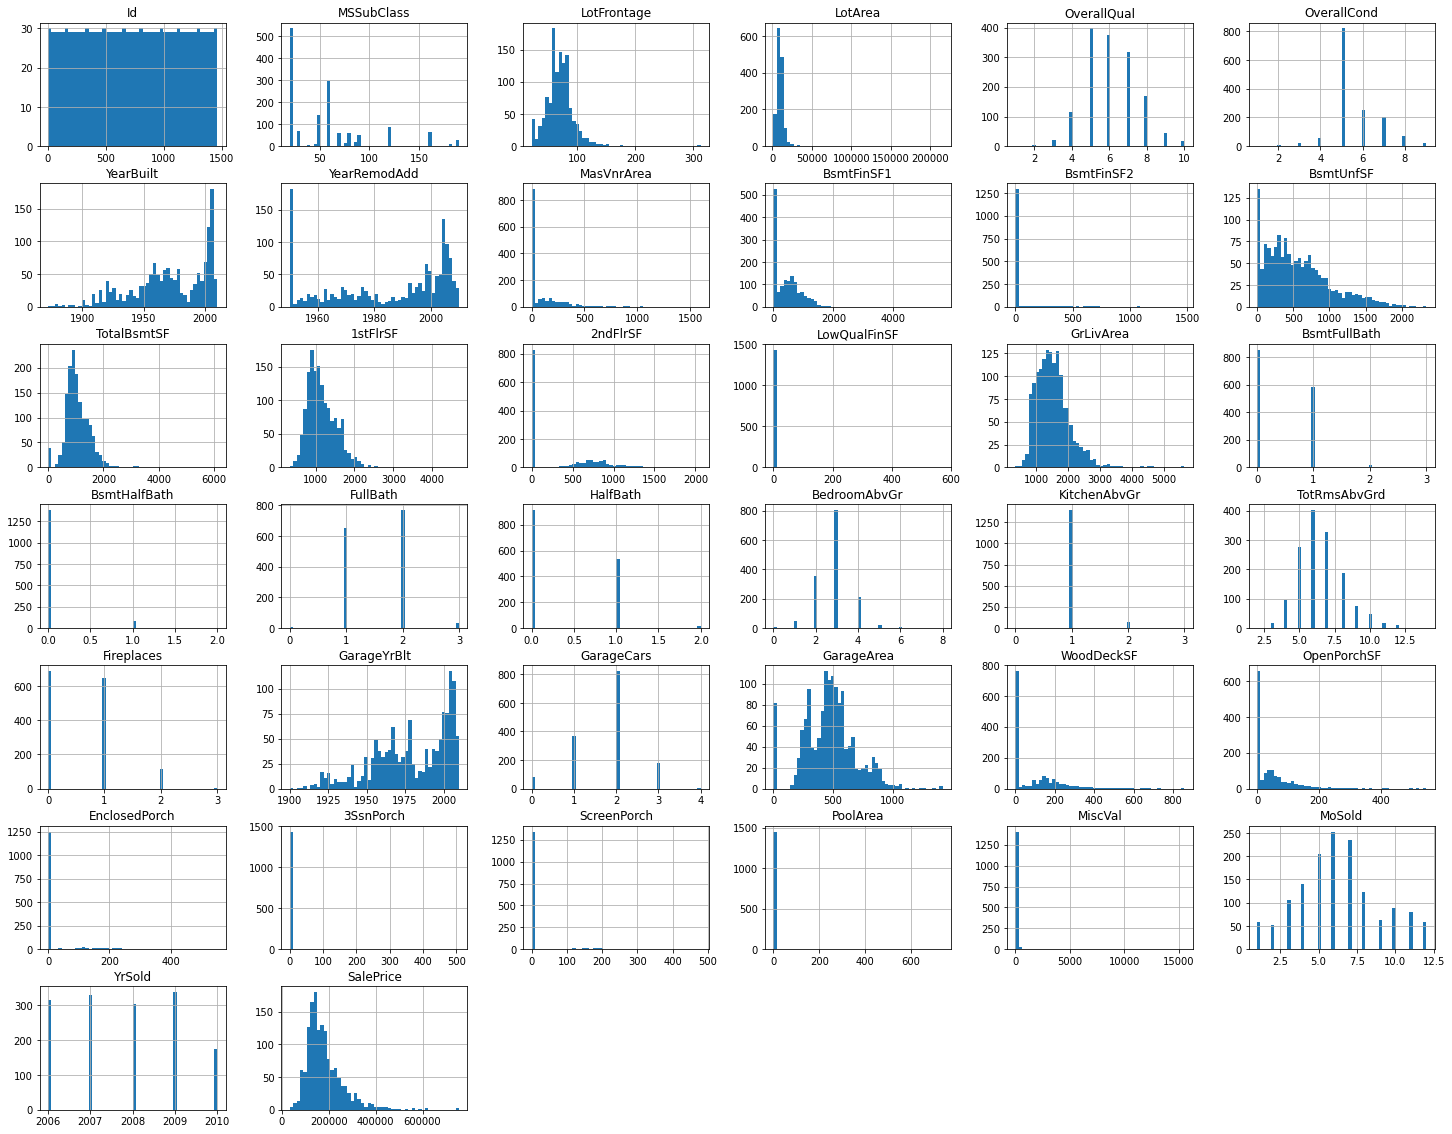

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(25,20))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
cormatrix = train_data.corr()
cormatrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

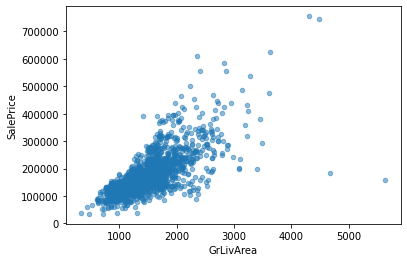

In [ ]:
train_data.plot(kind="scatter",  y="SalePrice", x="GrLivArea", alpha=0.5)

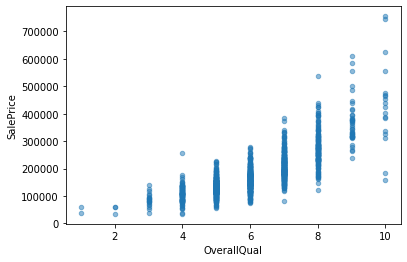

In [ ]:
train_data.plot(kind="scatter", y="SalePrice", x="OverallQual", alpha=0.5)

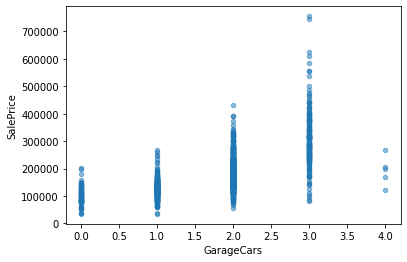

In [ ]:
train_data.plot(kind="scatter", y="SalePrice",  x="GarageCars",alpha=0.5)

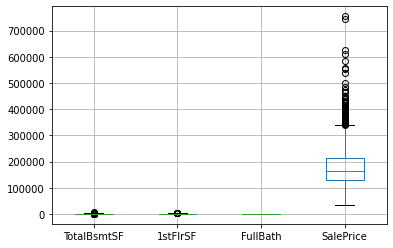

In [ ]:
train_data.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

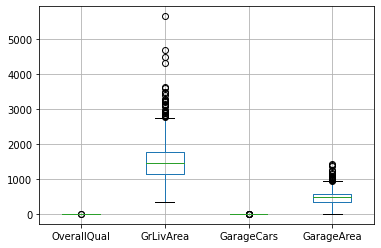

In [ ]:
train_data.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

In [ ]:
train_data.fillna(train_data.mean(), inplace = True)
test_data.fillna(test_data.mean(), inplace = True)

In [ ]:
train_data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [ ]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_data[column].values))
    train_data[column] = encoder.transform(list(train_data[column].values))




In [ ]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_data[column].values))
    test_data[column] = encoder_test.transform(list(test_data[column].values))

In [ ]:
x_values = train_data[train_data.columns[:80]]
x_test_values = test_data[test_data.columns[:80]]
y_values = train_data['SalePrice']

In [ ]:
# Training regression model

from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)

0.8548395143943592

In [ ]:
predicted = reg_model.predict(x_test_values)

In [ ]:
pd.DataFrame({'Predicted House Price Values': predicted})

,Predicted House Price Values
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
